In [16]:
import os
import sklearn
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib  as mpl
import matplotlib .pyplot as plt

#To make the notebook's output stable across runs
np.random.seed(42)

#Uses Jupyter's own backend to plot
%matplotlib inline

#To make pretty figures
mpl.rc("axes", labelsize=14)
mpl.rc("xtick", labelsize=12)
mpl.rc("ytick", labelsize=12)

#Path for saving images 
IMAGES_PATH = os.path.join("images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Section: Linear Regression

In chapter 1, the regression model of life satisfaction was - <strong>life_satisfaction</strong> = <strong>theta[0]</strong> + <strong>theta[1]</strong> * <strong>GDP_per_capita</strong>. A linear function where <strong>theta[0]</strong> and <strong>theta[1]</strong> are the models hyperparameters and <strong>GDP_per_capita</strong> is the input feature

In other words, it makes a prediction by computing a weighted sum of the input features + a constant called the bias term (theta0)

Vectorized equation of Linear Regression

<img src="images/Linear regression - vectorized equation.png">

<ul>
    <li>
<strong>theta</strong> is the models parameter vector, containing the bias term <strong>theta[0]</strong> and the feature weights <strong>theta[1]</strong> to <strong>thetan</strong>
    </li>
    <li><strong>x</strong> is the instances feature vector, containing <strong>x[0]</strong> to <strong>x[n]</strong>, with <strong>x0</strong> always equal to 1</li>
    <li><strong>theta*x</strong> is the dot product of <strong>theta</strong> and <strong>x</strong></li>
    <li><strong>h0</strong> is the hypothesis function, using the model parameters <strong>theta</strong></li>
</ul>

When we train a model, we want it to best fit the training set. We do this by measuring it's performance with the mean squared error (MSE). So, we need to find the value of <strong>theta</strong> that minimizes MSE.

Mean squared error equation

<img src="images/Mean squared error equation.png">

##### The normal equation

There is a <em>closed form solution</em> that gives us the value of <strong>theta</strong> which minimizes the cost function, Knonwn as <em>Normal Equation</em>

<img src="images/Normal equation.png">

<ul>
    <li><strong>theta_hat</strong> is the value of <strong>theta</strong> that minimizes the cost function</li>
    <li><strong>y</strong> is the vector of target values containing <strong>y[1]</strong> to <strong>y[m]</strong></li>
</ul>

Use numpy to test the equation, we'll use the function: y = 4 + 3X[1] + Gaussian noise (random noise)

In [2]:
X = 2*np.random.rand(100, 1)
y = 4+3*X+np.random.rand(100, 1)

Saving figure generated_data_plot


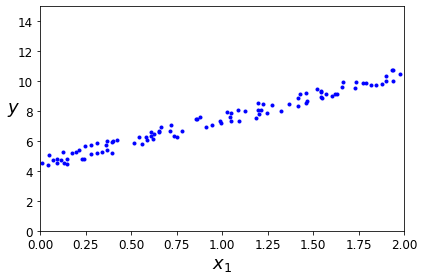

In [3]:
#Plot the values
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
save_fig("generated_data_plot")
plt.show()

Let's use the normal equation to compute <strong>theta_hat</strong>

In [6]:
X_b = np.c_[np.ones((100, 1)), X] #Add x[0]=1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [5]:
theta_best

array([[4.51359766],
       [2.98323418]])

We would hope that the results would be similar to our function 
(y = 4 + 3X[1] + Gaussina noise), where <strong>theta[0]</strong> = 4 and <strong>theta[1]</strong> = 3. Instead we got <strong>theta[0]</strong> = 4.5 and <strong>theta[1]</strong> = 2.9. The results are an outcome of how the noise affects the original function

Let's make a prediction using <strong>theta_hat</strong>

In [12]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] #Adds x[0]=1 to each instance
y_pred = X_new_b.dot(theta_best)
y_pred

array([[ 4.51359766],
       [10.48006601]])

Saving figure Linear model prediction plot


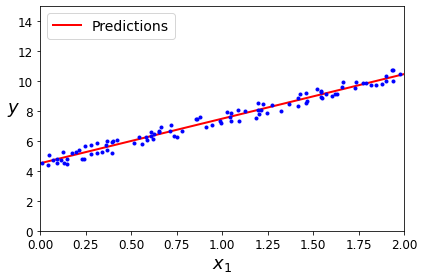

In [15]:
#Plot the predictions
plt.plot(X_new, y_pred, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
save_fig("Linear model prediction plot")
plt.show()

In Scikit Learn it's very simple to do a linear regression

In [19]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.51359766]), array([[2.98323418]]))

In [20]:
lin_reg.predict(X_new)

array([[ 4.51359766],
       [10.48006601]])

Scikit Learn's LinearRegression() class is based on the scipy.linalg.lstsq() function (the name stands for "least squared") which you could call directly

In [22]:
#numpy.linalg.lstsq(a, b, rcond="warn")
#Returns x(array), residuals(array), rank(int), s(array)
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.51359766],
       [2.98323418]])

This function computes <strong>theta_hat</strong> = <img src="images/Moore P + vector of target values.svg" style="display:inline-block; margin:0;">, where <img src="images/Moore-penrose pseudo-inverse.svg" style="display:inline-block; margin:0;"> is the pseudoinverse of <strong>X</strong>. You can call it directly

In [23]:
#numpy.linalg.pinv(a, rcond=1e-15, hermitian=False)
#Returns B(array) - pseudoinverse of a
np.linalg.pinv(X_b).dot(y)

array([[4.51359766],
       [2.98323418]])

This approach uses a standard matrix factorization technique called <em>Singular Value Decompisition</em> (SVD) that decomposes the trainin set matrix <strong>X</strong> into the matrix multiplication of three matrices <img src="images/SVD matrices.png" style="display:inline-block; margin:0;">. This makes it more efficient than computing the normal equation and it handles edge cases as well

##### Computational complexity

In <em>Normal Equation</em> the computational complexity of inverting a matrix is O(n^2.4) to O(n^3). So, if you double the number of features, you multiply the computation time by roughly 2^2.4 = 5.3 to 2^3 = 8

In <em>SVD approach</em> used by Scikit Learn's LinearRegression it's about O(n^2). So, if you double the number of features, you multiply the computational time by roughly 4

<strong>Note:</strong> Both get very slow once the number of features grow very large (100,000). But, because both are linear with regard to the number of instances in the training set (they're O(m)), they can handle large training set efficiently

In the next section, we will look at how to use <em>gradient descent</em> in cases where there are large number of features or too many training instances to fit in memory